In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 13

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score 
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

## Data import

In [2]:
fname,fnamey="x_12d.dat","y_12d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  L=D=",D)
x=data

N= 600   L=D= 12


## Heatplot of the performance of DBscan with different parameters

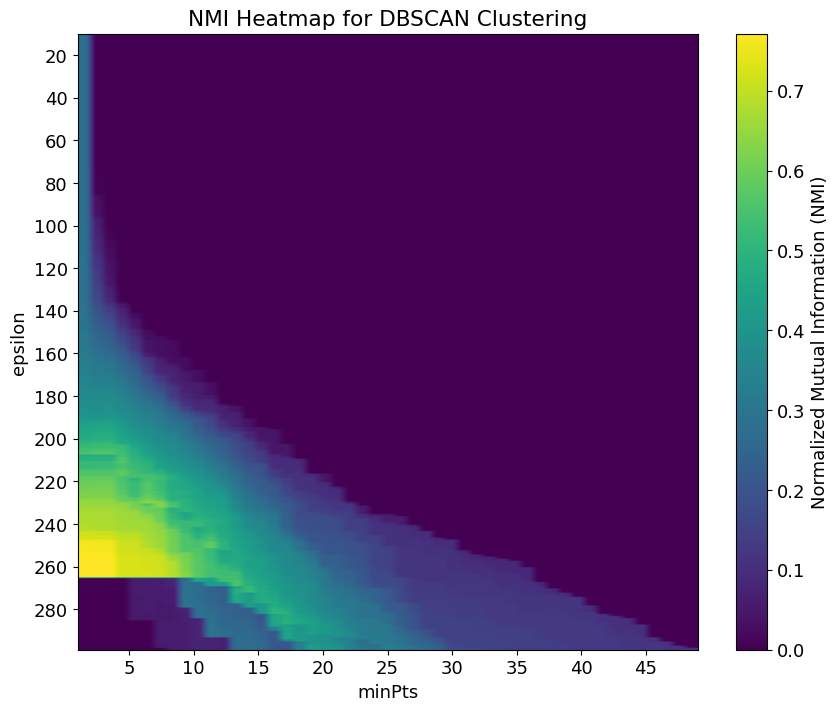

In [3]:
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
from collections import OrderedDict
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)


n_true_center=3
X = data
y_true = y


eps_range = np.arange(10,300,1)
min_sample_range = np.arange(1,50,1)
nmi_values= np.zeros((len(eps_range), len(min_sample_range)))

i,j=0,0
nmi=1
    
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        nmi=NMI(y_hat, y_true)
        nmi_values[i,j]= nmi



# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(nmi_values, extent=[min_sample_range[0], min_sample_range[-1], eps_range[-1], eps_range[0]], aspect='auto', cmap='viridis')
# Increase the number of tick marks on both axes
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=20)

plt.colorbar(label='Normalized Mutual Information (NMI)')
plt.xlabel('minPts')
plt.ylabel('epsilon')
plt.title('NMI Heatmap for DBSCAN Clustering')
plt.show()

In [4]:
max_value= np.max(nmi_values)
print ('Best NMI value for DBSCAN clustering:', max_value)

Best NMI value for DBSCAN clustering: 0.7714454028652105


The heat map visualizes the normalized mutual information (NMI) between true and predicted clusters for varying parameters epsilon and the minimum number of points (minPts) for DBSCAN clustering. From the analysis is evident that the highest NMI values are observed for epsilon around 250 and minPts values of 2 or 3.

In contrast, the NMI values are considerably lower for epsilon values higher than 270 and for all combinations in the upper right parte of the heatmap. This suggest that those parameter combinations may not be optimal for clustering the given dataset. Overall, the heatmap provides valuable insights into the relationship between epsilon, minPts and clustering performace.

## PCA dimensionality reduction procedure

[0.5608603 0.309137  0.0928226]


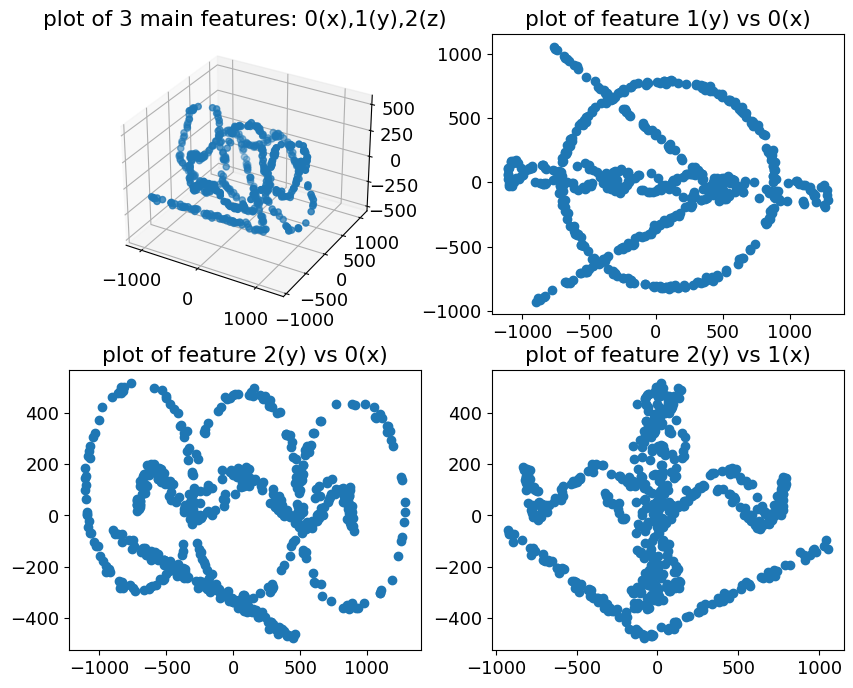

In [5]:
pca=PCA(n_components=3)     #chose 3 because doing it with 12 shows that only 3 are important
pca.fit(x)
print(pca.explained_variance_ratio_)
x_red=pca.transform(x)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(221, projection='3d')
ax1.set_title("plot of 3 main features: 0(x),1(y),2(z)")
ax1.scatter(x_red[:, 0], x_red[:, 1], x_red[:, 2])  # Pass entire transformed data
ax2 = fig.add_subplot(222)
ax2.set_title("plot of feature 1(y) vs 0(x)")
ax2.scatter(x_red[:,0],x_red[:,1])
ax3 = fig.add_subplot(223)
ax3.set_title("plot of feature 2(y) vs 0(x)")
ax3.scatter(x_red[:,0],x_red[:,2])
ax4 = fig.add_subplot(224)
ax4.set_title("plot of feature 2(y) vs 1(x)")
ax4.scatter(x_red[:,1],x_red[:,2])


plt.show()

## K-Means procedure

C:\Users\feder\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


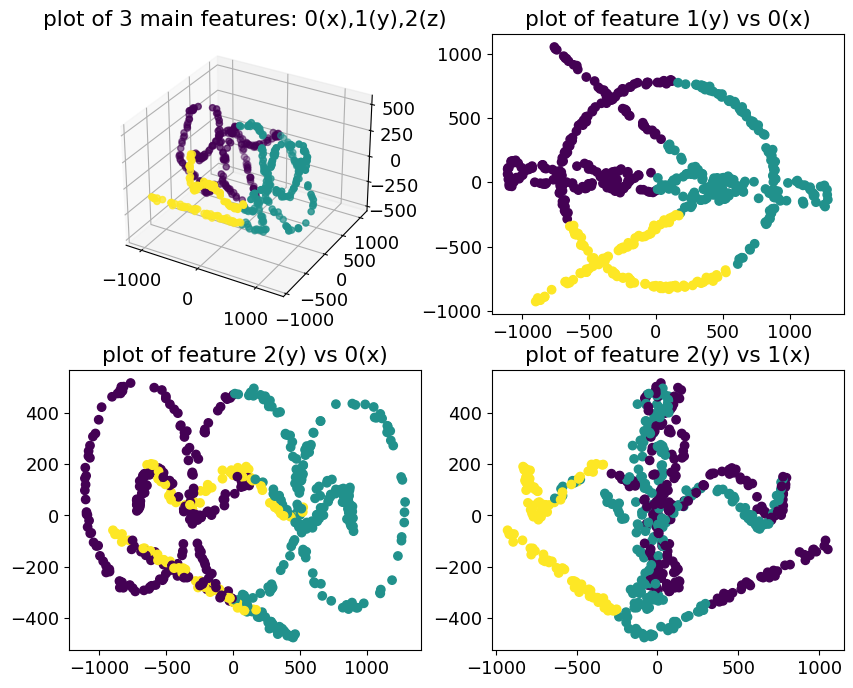

In [6]:
kmeans = KMeans(n_clusters=3).fit(x)      
y_pred = kmeans.predict(x)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(221, projection='3d')
ax1.set_title("plot of 3 main features: 0(x),1(y),2(z)")
ax1.scatter(x_red[:, 0], x_red[:, 1], x_red[:, 2], c=y_pred)  # Pass entire transformed data
ax2 = fig.add_subplot(222)
ax2.set_title("plot of feature 1(y) vs 0(x)")
ax2.scatter(x_red[:,0],x_red[:,1], c=y_pred)
ax3 = fig.add_subplot(223)
ax3.set_title("plot of feature 2(y) vs 0(x)")
ax3.scatter(x_red[:,0],x_red[:,2], c=y_pred)
ax4 = fig.add_subplot(224)
ax4.set_title("plot of feature 2(y) vs 1(x)")
ax4.scatter(x_red[:,1],x_red[:,2], c=y_pred)

In [7]:
nmi_k = NMI(y,y_pred)
print("NMI with k-means clustering:",nmi_k)

NMI with k-means clustering: 0.1262573159403544


Tipically, higher NMI scores indicate better clustering performance. The NMI scores calculated from both clustering algorithms are as follows:

-NMI_kmeans= 0.126

-NMI_DBSCAN= 0.771

Comparing these values, it's evident that DBSCAN demonstrates superior clustering performance. DBSCAN is preferred for our dataset due to its density-based nature, which enables it to handle non-linear cluster shapes and varying densities effectively. In contrast, k-means relies on distance-based calculations and assumes spherical clusters, which may not align with the structure of our dataset.
Furthermore, DBSCAN excels in handling noise points by classifying them into clusters, noise, or border points. Conversely, k-means may assign noise points to the nearest cluster centroid, potentially compromising cluster quality.

NMI for hierarchical clustering: 0.2840314674688764


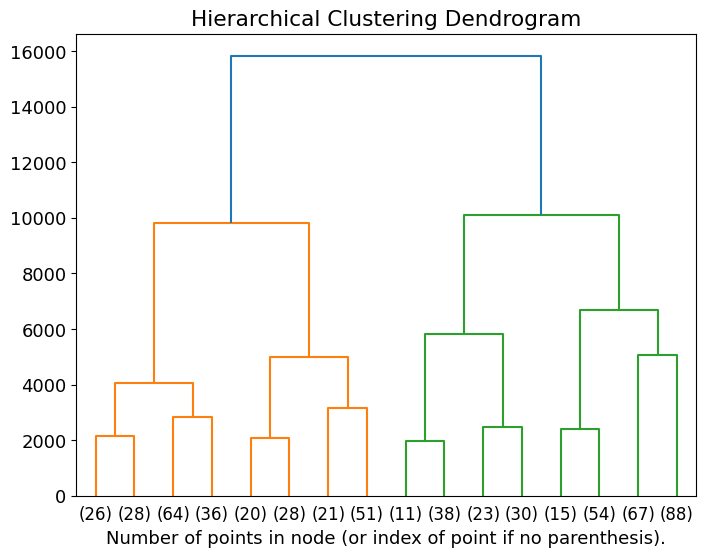

In [8]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

nmi_h = NMI(y,model.fit_predict(x))
print("NMI for hierarchical clustering:",nmi_h)

plt.figure(figsize=(8,6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

As can be seen by the NMI score, DBSCAN still greatly outperform also hierarchical clustering.